<a href="https://colab.research.google.com/github/ShvetsAlla/repo1/blob/main/%D0%BF%D1%80%D0%B5%D0%B4%D0%B8%D0%BA%D1%82_LTV_%D0%BA%D0%BE%D1%80%D0%B8%D1%81%D1%82%D1%83%D0%B2%D0%B0%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

# Завантажте файл з вашого комп'ютера
uploaded = files.upload()


Saving Product Analyst Test Task Data [Ver 2] – копія - Task 2.csv to Product Analyst Test Task Data [Ver 2] – копія - Task 2 (1).csv


In [7]:
import pandas as pd

# Прочитати CSV файл
df = pd.read_csv('Product Analyst Test Task Data [Ver 2] – копія - Task 2 (1).csv')

# Вивести перші кілька рядків
print(df.head())


                                user_id     event_timestamp  \
0  6f8592c0-fb4c-47dc-9344-424eb5d88a4b  2023-10-13 9:54:02   
1  95287b91-85af-4174-9986-aeafb3853bb6  2023-10-14 4:45:14   
2  95287b91-85af-4174-9986-aeafb3853bb6  2023-03-25 4:44:40   
3  95287b91-85af-4174-9986-aeafb3853bb6  2023-04-01 4:44:16   
4  95287b91-85af-4174-9986-aeafb3853bb6  2023-04-08 4:45:55   

  first_purchase_time cohort_week  lifetime_weeks   product_id  
0  2023-10-13 9:54:02  2023-10-08               0  weekly.2.49  
1  2023-03-25 4:44:40  2023-03-19              29  weekly.2.49  
2  2023-03-25 4:44:40  2023-03-19               0  weekly.2.49  
3  2023-03-25 4:44:40  2023-03-19               1  weekly.2.49  
4  2023-03-25 4:44:40  2023-03-19               2  weekly.2.49  


In [8]:
# Перетворення стовпців з датами в datetime формат
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df['first_purchase_time'] = pd.to_datetime(df['first_purchase_time'])

# Додавання нового стовпця для тижня, в якому сталася подія
df['event_week'] = df['event_timestamp'].dt.isocalendar().week

# Додавання нового стовпця для LTV
df['revenue'] = 1  # Якщо є конкретна метрика доходу, можна її вказати


In [9]:
# Групування даних за когортою і тижнем
ltv = df.groupby(['cohort_week', 'event_week'])['revenue'].sum().unstack(fill_value=0)

# Обчислення накопиченого LTV
ltv_cumulative = ltv.cumsum(axis=1)

# Перегляд LTV
ltv_cumulative.head()


event_week,9,10,11,12,13,14,15,16,17,18,...,33,34,35,36,37,38,39,40,41,42
cohort_week,,,,,,,,,,,,,,,,,,,,,
2023-02-26,20,32,42,51,58,66,72,79,85,89,...,146,149,152,155,156,157,159,161,164,164
2023-03-05,0,89,149,193,230,265,296,327,353,374,...,585,594,599,605,611,618,624,630,636,639
2023-03-12,0,0,69,110,143,170,205,227,247,268,...,440,446,453,460,467,473,480,484,488,489
2023-03-19,0,0,0,89,134,174,208,242,264,285,...,503,515,526,536,544,551,557,563,567,567
2023-03-26,0,0,0,0,53,83,109,134,156,177,...,335,340,345,352,357,362,366,370,375,375


In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Підготовка даних для моделювання
X = np.array(range(ltv_cumulative.shape[1])).reshape(-1, 1)  # Тижні
y = ltv_cumulative.mean(axis=0)  # Середнє значення LTV по когортам

# Побудова моделі
model = LinearRegression()
model.fit(X, y)

# Прогнозування на наступні 52 тижні
future_weeks = np.array(range(ltv_cumulative.shape[1], ltv_cumulative.shape[1] + 52)).reshape(-1, 1)
predicted_ltv = model.predict(future_weeks)


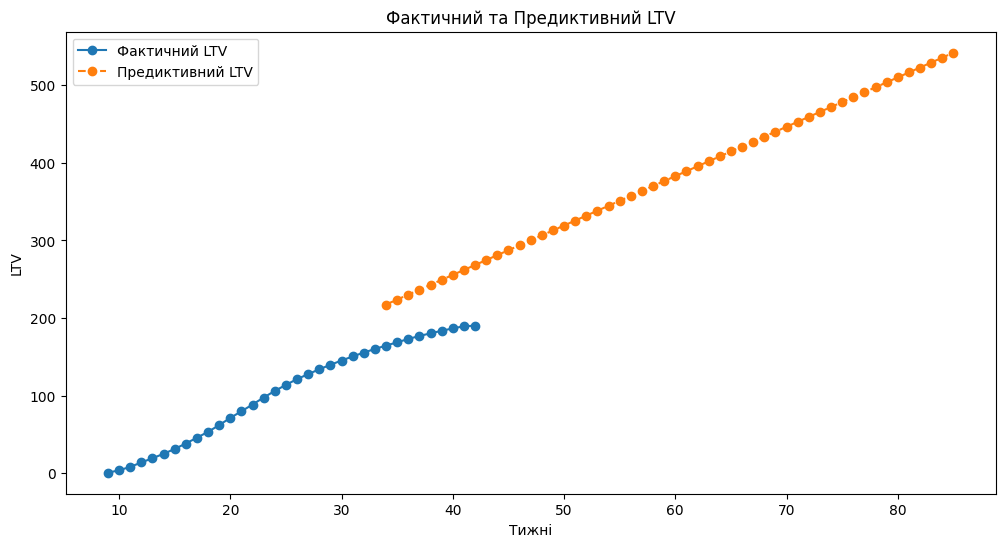

In [11]:
import matplotlib.pyplot as plt

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(ltv_cumulative.columns, ltv_cumulative.mean(axis=0), label='Фактичний LTV', marker='o')
plt.plot(range(ltv_cumulative.shape[1], ltv_cumulative.shape[1] + 52), predicted_ltv, label='Предиктивний LTV', marker='o', linestyle='--')
plt.title('Фактичний та Предиктивний LTV')
plt.xlabel('Тижні')
plt.ylabel('LTV')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y, model.predict(X)))
r2 = r2_score(y, model.predict(X))

print(f'RMSE: {rmse}, R²: {r2}')


RMSE: 8.555806455016251, R²: 0.981572462456321
